In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_antwerp_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('antwerp')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/antwerp_{date}.csv',index=False)
get_listings_antwerp_timeseries()

In [3]:
# pull in detailed_listings
raw_df_antwerp = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_antwerp)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(antwerp_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 1750 AirBnb listings.


In [4]:
antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
antwerp_raw_df_12_12_2020.shape





(1751, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for antwerp
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_antwerp = glob.glob('antwerp/**.csv')
files_antwerp

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['antwerp/Antwerp_2021-01.csv',
 'antwerp/Antwerp_2021-02.csv',
 'antwerp/Antwerp_2021-03.csv',
 'antwerp/Antwerp_2021-07.csv',
 'antwerp/Antwerp_2021-06.csv',
 'antwerp/Antwerp_2021-04.csv',
 'antwerp/Antwerp_2021-10.csv',
 'antwerp/Antwerp_2021-08.csv',
 'antwerp/Antwerp_2021-09.csv',
 'antwerp/Antwerp_2020-11.csv',
 'antwerp/Antwerp_2020-12.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(antwerp_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(antwerp_raw_df_12_12_2020['price'].mean(),2)}.")

antwerp_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(antwerp_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_1_9_2021['price'].mean(),2)}.")

antwerp_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(antwerp_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_2_8_2021['price'].mean(),2)}.")

antwerp_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(antwerp_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_3_4_2021['price'].mean(),2)}.")

antwerp_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(antwerp_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_4_9_2021['price'].mean(),2)}.")

#antwerp_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(antwerp_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_5_19_2021['price'].mean(),2)}.")

antwerp_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(antwerp_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_6_3_2021['price'].mean(),2)}.")

antwerp_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(antwerp_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_7_4_2021['price'].mean(),2)}.")

antwerp_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(antwerp_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_8_6_2021['price'].mean(),2)}.")

antwerp_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(antwerp_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_9_7_2021['price'].mean(),2)}.")

antwerp_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(antwerp_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_10_6_2021['price'].mean(),2)}.")

#antwerp_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(antwerp_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 1751 AirBnb listings; the avg price is €94.93.
The 1_9_2021 dataset contains 1717 AirBnb listings; the avg price is €91.93.
The 2_8_2021 dataset contains 1716 AirBnb listings; the avg price is €91.52.
The 3_4_2021 dataset contains 1749 AirBnb listings; the avg price is €96.45.
The 4_9_2021 dataset contains 1739 AirBnb listings; the avg price is €99.19.
The 6_3_2021 dataset contains 1810 AirBnb listings; the avg price is €99.63.
The 7_4_2021 dataset contains 1843 AirBnb listings; the avg price is €100.1.
The 8_6_2021 dataset contains 1792 AirBnb listings; the avg price is €100.99.
The 9_7_2021 dataset contains 1776 AirBnb listings; the avg price is €103.83.
The 10_6_2021 dataset contains 1750 AirBnb listings; the avg price is €106.99.


In [7]:
df_list_antwerp = [antwerp_raw_df_12_12_2020, antwerp_raw_df_1_9_2021, antwerp_raw_df_2_8_2021,
           antwerp_raw_df_3_4_2021, antwerp_raw_df_4_9_2021,  antwerp_raw_df_6_3_2021, antwerp_raw_df_7_4_2021,
           antwerp_raw_df_8_6_2021, antwerp_raw_df_9_7_2021, antwerp_raw_df_10_6_2021]

dates_antwerp = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_antwerp = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_antwerp = []

def airbnb_parse_antwerp(df_list, files):
    for file in files_antwerp:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_{file}.csv")
        print(f"The {file} antwerp dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_antwerp(df_list, dates):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_{file}.csv")
        #print(f"The {date} antwerp dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_antwerp.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_antwerp)

antwerp_parse = airbnb_parse_antwerp(df_list_antwerp, files_antwerp)


The 2020-12 antwerp dataset contains 1751 AirBnb listings -- the avg price is €94.93.
The 2021-01 antwerp dataset contains 1717 AirBnb listings -- the avg price is €91.93.
The 2021-02 antwerp dataset contains 1716 AirBnb listings -- the avg price is €91.52.
The 2021-03 antwerp dataset contains 1749 AirBnb listings -- the avg price is €96.45.
The 2021-04 antwerp dataset contains 1739 AirBnb listings -- the avg price is €99.19.
The 2021-06 antwerp dataset contains 1810 AirBnb listings -- the avg price is €99.63.
The 2021-07 antwerp dataset contains 1843 AirBnb listings -- the avg price is €100.1.
The 2021-08 antwerp dataset contains 1792 AirBnb listings -- the avg price is €100.99.
The 2021-09 antwerp dataset contains 1776 AirBnb listings -- the avg price is €103.83.
The 2021-10 antwerp dataset contains 1750 AirBnb listings -- the avg price is €106.99.


In [8]:
antwerp_summary = airbnb_to_frame_antwerp(df_list_antwerp, files_antwerp)
antwerp_summary['Date of scrape'] = pd.to_datetime(antwerp_summary['Date of scrape'])
antwerp_summary['City'] = 'antwerp'
antwerp_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,1751,94.93,71.0,12,3200,1.29,antwerp
1,2021-01-01,1717,91.93,68.0,12,3200,1.27,antwerp
2,2021-02-01,1716,91.52,68.0,8,3200,1.27,antwerp
3,2021-03-01,1749,96.45,70.0,12,3200,1.24,antwerp
4,2021-04-01,1739,99.19,70.0,10,5800,1.23,antwerp
5,2021-06-01,1810,99.63,71.0,12,5800,1.32,antwerp
6,2021-07-01,1843,100.10,75.0,12,5800,1.37,antwerp
7,2021-08-01,1792,100.99,75.0,12,5800,1.58,antwerp
8,2021-09-01,1776,103.83,75.0,13,5800,1.61,antwerp
9,2021-10-01,1750,106.99,75.0,12,5800,1.65,antwerp


In [9]:
antwerp_summary_listings = antwerp_summary[['Date of scrape','# of Listings']]
antwerp_summary_listings.set_index('Date of scrape', inplace=True)


antwerp_summary_prices_avg = antwerp_summary[['Date of scrape', 'Avg Price']]
antwerp_summary_prices_avg.set_index('Date of scrape', inplace=True)

antwerp_summary_prices_median = antwerp_summary[['Date of scrape', 'Median Price']]
antwerp_summary_prices_median.set_index('Date of scrape', inplace=True)

antwerp_summary_reviews_permonth = antwerp_summary[['Date of scrape', 'Avg reviews per month']]
antwerp_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

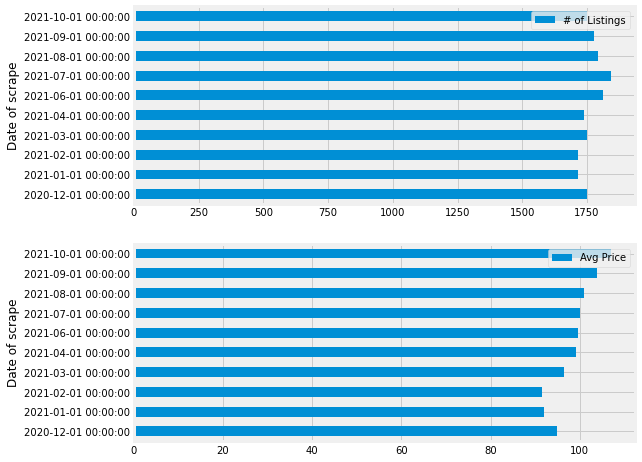

In [10]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

antwerp_summary_listings.plot(ax=ax1, kind='barh')
antwerp_summary_prices_avg.plot(ax=ax2, kind='barh')

In [11]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

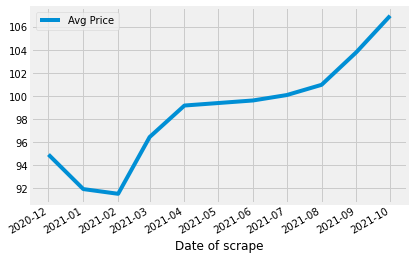

In [12]:
antwerp_summary.plot(x='Date of scrape', y='Avg Price')

In [13]:
master_df_antwerp = pd.concat(df_list_antwerp)
master_df_antwerp = master_df_antwerp[master_df_antwerp['room_type']=='Entire home/apt']
master_df_antwerp_unique = master_df_antwerp.drop_duplicates(subset='id')
#master_df_antwerp_unique = master_df_antwerp[master_df_antwerp_unique['room_type']=='Entire home/apt']
master_df_antwerp_unique['room_type'].value_counts()

Entire home/apt    1918
Name: room_type, dtype: int64

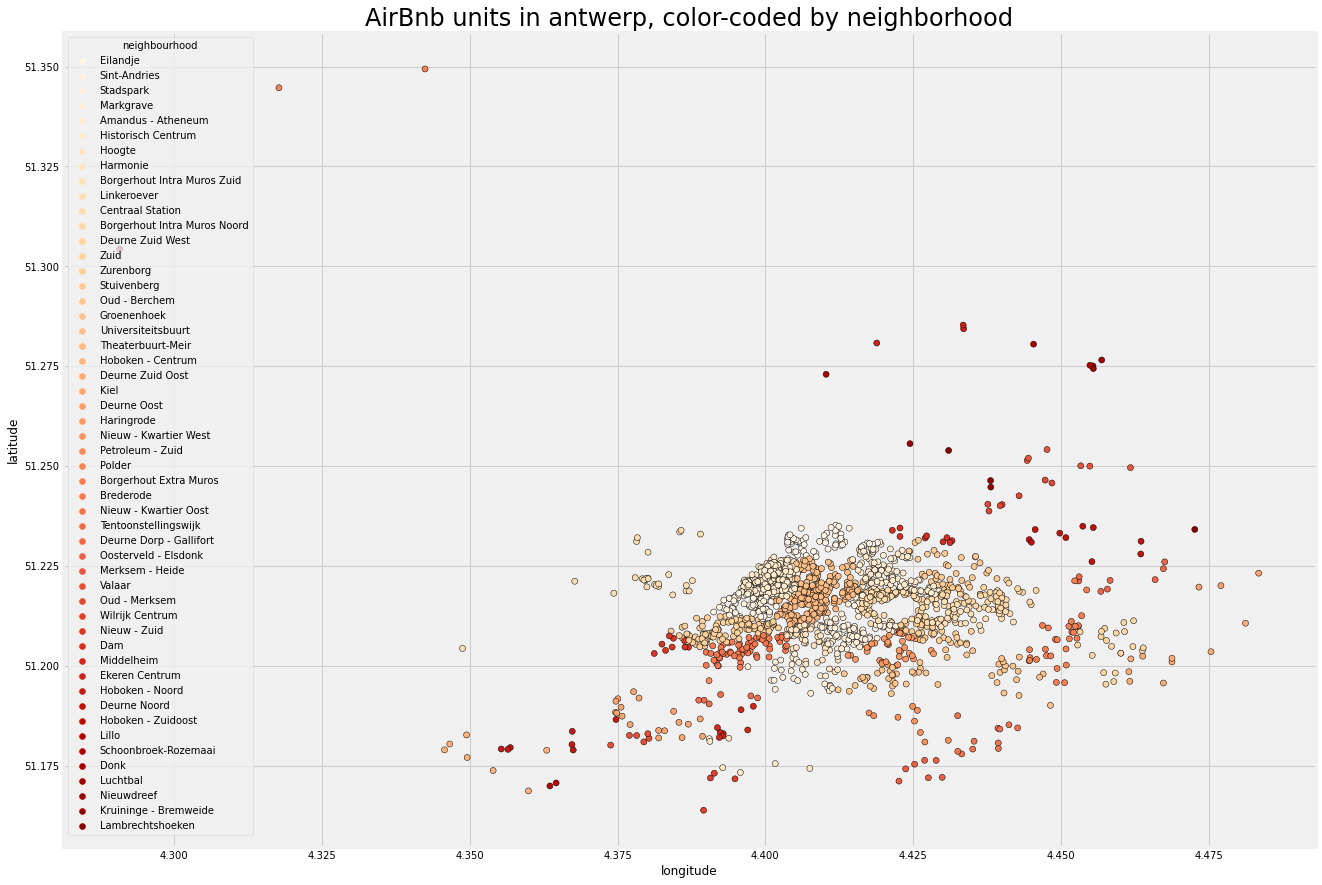

In [14]:
title = 'AirBnb units in antwerp, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_antwerp_unique.longitude, master_df_antwerp_unique.latitude, hue = master_df_antwerp_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_antwerp.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([antwerp_raw_df_10_6_2021,raw_df_antwerp],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(1369, 75)

## Regression

In [16]:
#df_reviews_.columns

In [17]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [18]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -172.80621343577613
Coefficients:  [ -1.02597369  78.64453879   1.0650032    0.7170623    3.1732666
  15.10701452  43.02669451   5.19341785 -38.10888283]
LinearRegression()


In [19]:
y_pred2 = regr.predict(X_)

In [20]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(1104, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

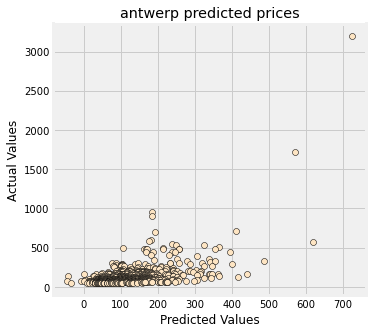

In [21]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('antwerp predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [22]:
df_result.index

Int64Index([1013, 1201, 1381, 1384, 1538,  196, 1125,  444,  943,  945,
            ...
             305, 1356,  983,  556, 1144,  335, 1223,  187,  623, 1224],
           dtype='int64', length=1104)

In [23]:
raw_df_antwerp.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50904,https://www.airbnb.com/rooms/50904,20211028055703,2021-10-28,aplace/antwerp: cosy suite - fashion district,"Decorated in a vintage style combined with a few new objects which quarantees you a warm and cosy room.<br /><br /><b>The space</b><br />Aplace Antwerp is located on a charming little square in the very center of Antwerp (fashion district area). Literally around the corner of everything you want to see in this beautifull city.<br /><br />This suite has been completely renovated since december 2012. It is being decorated in a vintage style combined with a few new objects which quarantees you a warm and cosy room.<br /><br />It has a small sitting corner with sofa, digital tv, a docking station, dvd-player, a shared kitchinette with Illy espresso machine, a perculator and a little fridge and a microwave. The bathroom has a walk-in / rainshower.<br /><br /><br />This suite is situated in the back of the building and is extremely cosy.<br /><br />Aplace is situated in the middle of the old town of Antwerp. On the corner of ‘de Groenplaats’ and the Big Market, the designer shops and the ‘Kl",NaN,https://a0.muscache.com/pictures/f14b0908-cbc3-4344-a8ff-46b123f25713.jpg,234077,https://www.airbnb.com/users/show/234077,...,5.00,5.00,5.00,NaN,f,4,2,0,0,0.03
1,116134,https://www.airbnb.com/rooms/116134,20211028055703,2021-10-28,Spacious apartment nearby Mas,"Enjoy your stay at our 4 person apartment in the trendy old harbour of Antwerp. It entails all the luxury and comfort you need for a short or longer stay in the vibrant city.<br /><br /><b>The space</b><br />You'll have the chance to stay in a very nice, new modern apartment, for 4 guests, ideally located, at the Antwerp Marina (neighbourhood 't Eilandje), between the new MAS museum and the Red Star Line museum. It is located 15 minutes walk to the historic city center, in a lively trendy, upcoming neighbourhood, with plenty of restaurants, cafés, art galleries, ... We'll be glad to advice you on the nice places in this area. <br /><br />A spacious, completely new apartment, with all amenities : 2 bedrooms, each with a kingsize boxspring bed, 2 bathrooms, 2 terraces, 2 toilets, a spacious living room, a fully equipped kitchen (microwave, oven, dishwasher, Nespresso machine, etc, ...<br />Flatscreen tv, stereo, dvd, ipod connection, wireless WiFi internet, , <br /><br />There is a parki","The area ""`t eilandje"" is located at the old harbour of the city. It has a unique laidback vibe, with a lot of great restaurants, bars and cafés. Enjoy a glass on one of the many terrasses or just a walk through the MAS museum. You could also walk to the city centre in 15 minutes.",https://a0.muscache.com/pictures/23732573/07084153_original.jpg,586942,https://www.airbnb.com/users/show/586942,...,4.92,4.89,4.76,NaN,f,1,1,0,0,1.28
2,218916,https://www.airbnb.com/rooms/218916,20211028055703,2021-10-28,Apartment with terrace in trendy Zurenborg,"Do you enjoy authentic places with a lot of charm? Parquet flooring, high ceilings, many nice ornaments. The neighbourhood Zurenborg is a real gem. The square near the house 'Dageraadplaats' is packed with bars and restaurants. All generations enjoy the lively athomsphere, parents can enjoy the many terraces while kids are playing safely on the playground. This apartment has a small terrace. It is near the train station and very well connected with public transport to get to the centre of town.<br /><br /><b>The space</b><br />This apartment has one room with a double bunk bed. A big sofa in the living room can be used as a bed if necessary. The house was built in t

In [24]:
df_result['id'] = df_result.index.values
df_result.shape

(1104, 4)

In [25]:
raw_df_antwerp.index.values
df_result.index.values

array([1013, 1201, 1381, ...,  187,  623, 1224])

In [26]:
df_result_merge = df_result.merge(raw_df_antwerp, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(1750, 77)

In [27]:
df_join = df_result.join(raw_df_antwerp, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                            0
Predicted                                         0
Diff                                              0
id_x                                              0
id_y                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               147
Length: 78, dtype: int64

In [28]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [29]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_antwerp = df_print[df_print['Predicted']>0]
df_print_antwerp.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
1013,1013,3200,"$3,200.00",724.396736,-2475.603264,https://www.airbnb.com/rooms/40652467,51.20810,4.41158,16,Stadspark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1201,1201,1725,"$1,725.00",569.471848,-1155.528152,https://www.airbnb.com/rooms/44386212,51.22597,4.40789,12,Universiteitsbuurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1381,1381,950,$950.00,185.558310,-764.441690,https://www.airbnb.com/rooms/48396039,51.21911,4.39998,16,Historisch Centrum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1384,1384,900,$900.00,185.558310,-714.441690,https://www.airbnb.com/rooms/48416528,51.21846,4.39995,16,Historisch Centrum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1538,1538,700,$700.00,192.701096,-507.298904,https://www.airbnb.com/rooms/50759581,51.20736,4.41553,8,Stadspark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
df_print_antwerp['neighbourhood_cleansed'].value_counts()

Historisch Centrum              208
Theaterbuurt-Meir               120
Centraal Station                 84
Amandus - Atheneum               75
Zuid                             66
Sint-Andries                     59
Stadspark                        54
Universiteitsbuurt               51
Brederode                        35
Eilandje                         35
Borgerhout Intra Muros Zuid      34
Harmonie                         33
Borgerhout Intra Muros Noord     24
Oud - Berchem                    21
Haringrode                       20
Stuivenberg                      20
Markgrave                        16
Zurenborg                        16
Deurne Zuid West                 14
Borgerhout Extra Muros           13
Linkeroever                      13
Dam                               8
Deurne Zuid Oost                  8
Groenenhoek                       8
Kiel                              5
Deurne Dorp - Gallifort           5
Hoboken - Noord                   5
Hoboken - Centrum           

In [31]:
df_print_antwerp_final = df_print_antwerp.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_antwerp_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [32]:
df_antwerp_query = df_print_antwerp_final.query('number_of_reviews >11 & accommodates <=6')
df_antwerp_query.shape
#df_antwerp_query.head()

(480, 18)

In [33]:
df_antwerp_query_filter = df_antwerp_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_antwerp_query_filter.shape


(306, 18)

In [34]:
df_antwerp_query_filter.shape

(306, 18)

In [35]:
df_neighborhood_plot = df_print_antwerp_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
36,Polder,568.000000
30,Nieuw - Kwartier West,213.000000
8,Deurne Noord,197.000000
16,Haringrode,153.352941
38,Stadspark,144.365854
31,Nieuw - Zuid,144.000000
24,Lillo,140.000000
9,Deurne Oost,127.500000
6,Dam,126.500000
42,Universiteitsbuurt,120.909091


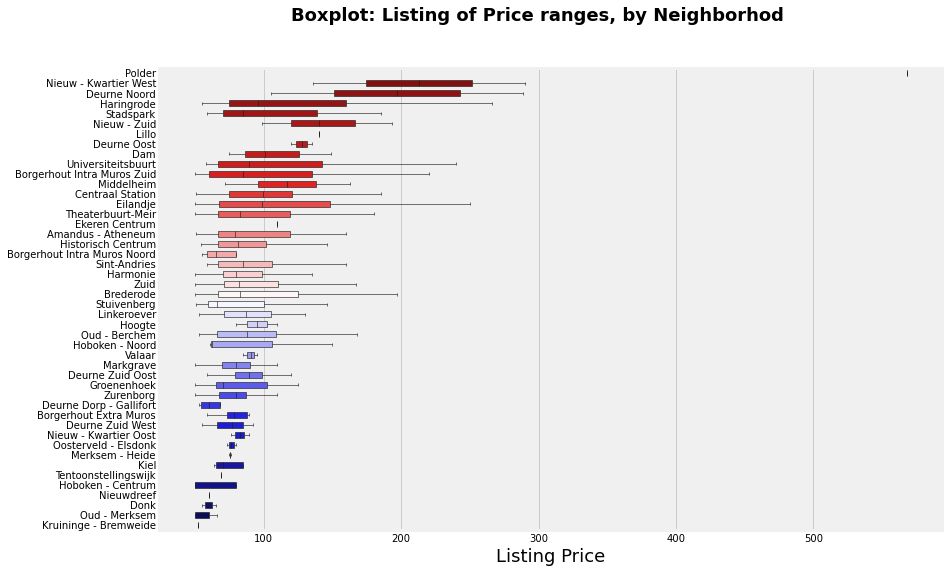

In [64]:
df_neighborhood_plot = df_print_antwerp_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_antwerp_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

fig.savefig('antwerp_neighborhood_boxplot.png')

In [37]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [38]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_antwerp)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 1750 files in the dataset
There is 864 to be regressed with accommodates <=4


In [39]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  -53.74225090445512
Coefficients:  [  9.20240937  15.23447726   3.44018283   0.58291303   1.96842467
  -7.72801707  18.02834423  16.88869958 -13.44217349]
LinearRegression()


In [40]:
y_pred2_4 = regr4.predict(X_4)

In [41]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(784, 3)

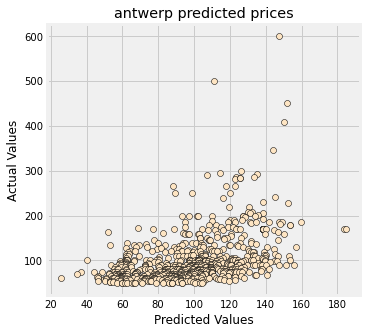

In [42]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('antwerp predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [43]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_antwerp)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 1750 files in the dataset
There is 416 to be regressed with accommodates <=2


In [44]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -40.59615410959297
Coefficients:  [ 14.47406346  19.25534988  -5.59280979   0.43555292  12.75302991
   0.22545795  13.21535217  14.04258835 -27.24126855]
LinearRegression()


In [45]:
y_pred2_2 = regr2.predict(X_2)

In [46]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(357, 3)

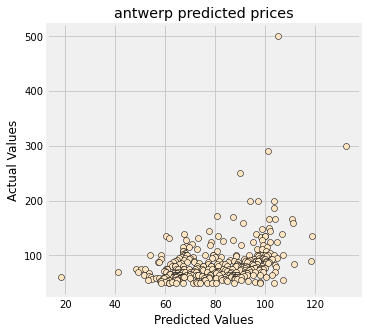

In [47]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('antwerp predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [48]:
## Regression fucntion, rooms for 2 or less

In [49]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_antwerp)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 1750 files in the dataset
There is 1007 to be regressed with accommodates <=6


In [50]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -40.55381238202341
Coefficients:  [  9.71246419  14.83491998  -0.28153058   0.57278608   2.61187932
  -5.65077861  19.39983829  16.46965233 -18.92686952]
LinearRegression()


In [51]:
y_pred6_6 = regr6.predict(X_6)

In [52]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(923, 3)

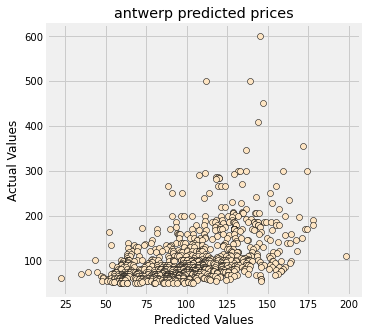

In [53]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('antwerp predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [54]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_antwerp)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 1750 files in the dataset
There is 1191 to be regressed


In [55]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -172.80621343577613
Coefficients:  [ -1.02597369  78.64453879   1.0650032    0.7170623    3.1732666
  15.10701452  43.02669451   5.19341785 -38.10888283]
LinearRegression()


In [56]:
y_predall_all = regrall.predict(X_all)

In [57]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(1104, 3)

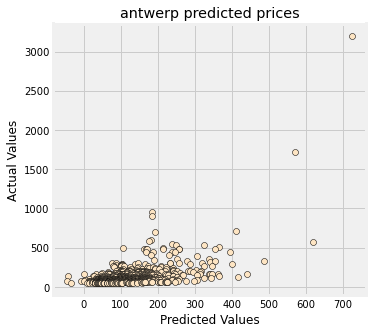

In [58]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('antwerp predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [59]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
1,116134,Entire rental unit,Entire home/apt,4,2.0,2.0,150,44,4.93,4.95,4.99,4.89,4.76
2,218916,Entire condominium (condo),Entire home/apt,5,1.0,3.0,85,0,4.57,4.58,4.38,4.79,4.50
4,224682,Entire rental unit,Entire home/apt,3,1.0,2.0,75,30,4.75,4.80,4.83,4.96,4.73
5,345959,Entire rental unit,Entire home/apt,3,2.0,2.0,50,33,4.78,4.81,4.85,4.43,4.79
6,363155,Entire rental unit,Entire home/apt,2,1.0,1.0,68,39,4.81,4.95,4.91,4.64,4.82


In [60]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  -172.80621343577613
Coefficients:  [ -1.02597369  78.64453879   1.0650032    0.7170623    3.1732666
  15.10701452  43.02669451   5.19341785 -38.10888283]
Intercept:  -40.59615410959297
Coefficients:  [ 14.47406346  19.25534988  -5.59280979   0.43555292  12.75302991
   0.22545795  13.21535217  14.04258835 -27.24126855]
Intercept:  -53.74225090445512
Coefficients:  [  9.20240937  15.23447726   3.44018283   0.58291303   1.96842467
  -7.72801707  18.02834423  16.88869958 -13.44217349]
Intercept:  -40.55381238202341
Coefficients:  [  9.71246419  14.83491998  -0.28153058   0.57278608   2.61187932
  -5.65077861  19.39983829  16.46965233 -18.92686952]


In [61]:
df_antwerp_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
466,466,160,$160.00,197.611620,37.611620,https://www.airbnb.com/rooms/23521144,51.20626,4.41043,2,Stadspark,4.93,5.00,5.00,5.00,4.90,4.98,4.80,41
582,582,122,$122.00,194.547199,72.547199,https://www.airbnb.com/rooms/28778081,51.20458,4.39250,4,Brederode,4.92,4.83,4.75,4.96,4.96,4.88,4.88,25
520,520,163,$163.00,186.205362,23.205362,https://www.airbnb.com/rooms/26592318,51.18304,4.39287,4,Middelheim,4.71,4.86,4.67,4.71,4.76,4.81,4.52,21
825,825,181,$181.00,183.205025,2.205025,https://www.airbnb.com/rooms/36031281,51.21419,4.40013,4,Sint-Andries,4.77,4.92,4.92,4.96,4.88,4.96,4.77,26
567,567,146,$146.00,179.542861,33.542861,https://www.airbnb.com/rooms/28363835,51.21979,4.40179,4,Historisch Centrum,4.93,4.94,4.95,4.90,4.90,4.97,4.80,115


## Find the highest predicted in antwerp - <= 4

In [62]:
df_antwerp_query_filter['% Diff'] = (df_antwerp_query_filter['Actual']/df_antwerp_query_filter['Predicted']-1)* 100
df_antwerp_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_antwerp_query_final = df_antwerp_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_antwerp_query_final)} listings that meet criteria')
df_antwerp_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head()


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 306 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
466,160,197.61,-19.03,4.93,5.00,5.00,4.98,4.80,Stadspark,https://www.airbnb.com/rooms/23521144,2,41
582,122,194.55,-37.29,4.92,4.83,4.75,4.88,4.88,Brederode,https://www.airbnb.com/rooms/28778081,4,25
520,163,186.21,-12.46,4.71,4.86,4.67,4.81,4.52,Middelheim,https://www.airbnb.com/rooms/26592318,4,21
825,181,183.21,-1.20,4.77,4.92,4.92,4.96,4.77,Sint-Andries,https://www.airbnb.com/rooms/36031281,4,26
567,146,179.54,-18.68,4.93,4.94,4.95,4.97,4.80,Historisch Centrum,https://www.airbnb.com/rooms/28363835,4,115


## Find the best deal in antwerp - <=4

In [63]:
df_antwerp_deal = df_antwerp_query_final[df_antwerp_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_antwerp_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
83,50,133.10,-62.43,4.78,4.85,4.73,4.55,4.80,Hoboken - Centrum,https://www.airbnb.com/rooms/5417459,4,91
171,50,130.27,-61.62,4.86,4.92,4.89,4.89,4.72,Theaterbuurt-Meir,https://www.airbnb.com/rooms/10015096,3,161
430,60,153.66,-60.95,4.71,4.78,4.54,4.53,4.63,Borgerhout Extra Muros,https://www.airbnb.com/rooms/22134240,4,77
1470,62,157.44,-60.62,5.00,4.95,4.95,4.74,5.00,Brederode,https://www.airbnb.com/rooms/49833357,3,19
312,50,122.44,-59.16,4.95,4.90,4.90,4.55,4.89,Brederode,https://www.airbnb.com/rooms/17446691,3,22
398,53,129.14,-58.96,4.67,4.79,4.74,4.65,4.67,Linkeroever,https://www.airbnb.com/rooms/20720825,4,43
568,59,143.38,-58.85,4.78,4.87,4.83,4.91,4.70,Theaterbuurt-Meir,https://www.airbnb.com/rooms/28364295,4,23
